In [1]:
import pycbc.noise
import pycbc.psd
import numpy as np
from scipy.interpolate import interp1d
from nullpol.time_frequency_transform import transform_wavelet_time, transform_wavelet_freq
from nullpol.psd import simulate_psd_from_psd
import matplotlib.pyplot as plt
import scipy.stats

/users/chun-fung.wong/.conda/envs/nullpol/lib/python3.8/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject


In [3]:
srate = 4096
seglen = 4
delta_f = 1 / seglen
tlen = srate * seglen
flen = tlen // 2 + 1
df = 32
Nf = int(srate / 2 / df)
Nt = int(tlen / Nf)
flow = 20
seed = 12
psd = pycbc.psd.aLIGODesignSensitivityP1200087(flen, delta_f, flow)
psd_interp = interp1d(psd.sample_frequencies, psd)
sim_freq = np.arange(Nf) * df
psd_i = psd_interp(sim_freq) / 2 * srate

In [ ]:
pycbc_psd / 2 * srate = wavelet_psd
pycbc_psd = 2 * wavelet_psd / srate

In [3]:
def simulate_psd(tlen, srate, psd, niter):
    var = []
    Nf = int(srate / 2 / df)
    Nt = int(tlen / Nf)
    for i in range(niter):
        noise = pycbc.noise.noise_from_psd(tlen, 1/srate, psd)
        noise_tf = transform_wavelet_time(noise.numpy(), Nf, Nt)
        var.append(noise_tf ** 2)
    var = np.concatenate(var)
    return np.mean(var, axis=0)


In [2]:
noise_1

NameError: name 'noise_1' is not defined

In [4]:
sim_psd = simulate_psd_from_psd(psd, seglen, srate, df, 20)

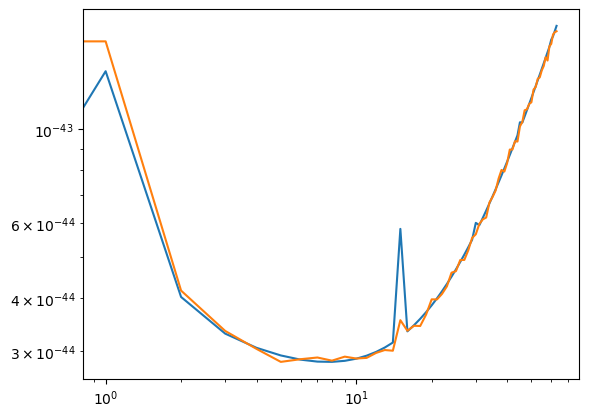

In [5]:
plt.loglog(psd_i)
plt.loglog(sim_psd)

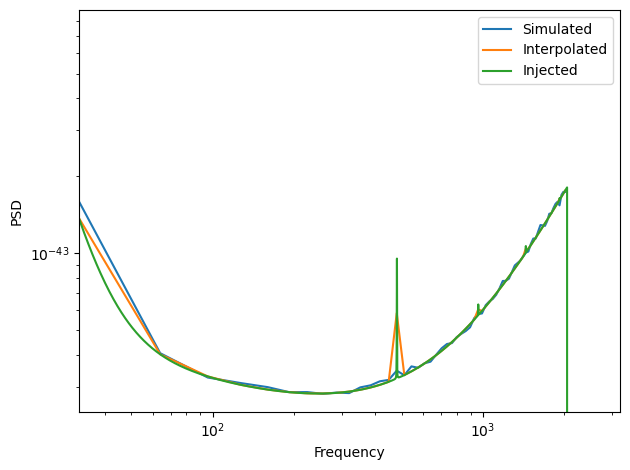

In [81]:
plt.loglog(sim_freq, sim_psd, label='Simulated')
plt.loglog(sim_freq, psd_i, label="Interpolated")
plt.loglog(psd.sample_frequencies, psd / 2 * srate, label="Injected")
plt.legend()
plt.xlim(32)
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.tight_layout()
plt.savefig('psd_comparison.png')
plt.show()

In [11]:
noise = pycbc.noise.noise_from_psd(tlen, 1/srate, psd)
noise_2 = pycbc.noise.noise_from_psd(tlen, 1/srate, psd)

In [12]:
noise_f = np.fft.rfft(noise)
noise_2_f = np.fft.rfft(noise_2)

In [13]:
noise_tf = transform_wavelet_freq(noise_f, Nf, Nt, 4.)
noise_2_tf = transform_wavelet_freq(noise_2_f, Nf, Nt, 4.)

In [14]:
noise_new_tf = transform_wavelet_freq(noise_f*noise_2_f, Nf, Nt, 4.)

In [10]:
noise_tf

array([[ 2.66737925e-22,  2.39242689e-22,  2.68957481e-22, ...,
        -2.30215783e-22, -1.99648373e-22,  2.51712666e-22],
       [ 1.38621950e-22,  8.88837208e-22,  1.40309141e-22, ...,
        -1.63309542e-22, -5.59394111e-22,  5.39139396e-22],
       [-3.48005805e-23, -2.37730154e-22,  2.40348883e-22, ...,
        -1.91972396e-22,  1.98783295e-23,  5.51365579e-22],
       ...,
       [ 1.92217619e-22, -3.44224961e-22,  4.07817412e-22, ...,
        -3.79003466e-22,  4.98282631e-22,  4.97884610e-22],
       [-7.48774282e-23,  8.58896501e-23, -3.97302111e-23, ...,
        -1.97490175e-22, -3.82112150e-22,  4.23193159e-23],
       [-5.84635634e-23, -1.28187024e-22, -3.31318409e-24, ...,
        -4.36162520e-22,  5.56053257e-22, -6.08934583e-22]])

In [9]:
noise_tf = transform_wavelet_time(noise.numpy(), Nf, Nt)
noise_2_tf = transform_wavelet_time(noise_2.numpy(), Nf, Nt)

In [73]:
noise_tf_w = np.divide(noise_tf, np.sqrt(sim_psd), where=sim_psd!=0, out=np.zeros_like(noise_tf))

In [68]:
noise_tf_w = np.divide(noise_tf, np.sqrt(psd_i), where=psd_i!=0, out=np.zeros_like(noise_tf))

In [69]:
np.var(noise_tf_w[2:,:].flatten())

0.9826811319200597

In [74]:
scipy.stats.kstest(noise_tf_w[2:,:].flatten(), cdf='norm')

KstestResult(statistic=0.004968404004580984, pvalue=0.815182684884135, statistic_location=-0.5066191853377511, statistic_sign=-1)

0.9802876445486935